## Basic statistics and time series analysis with Python
This chapter shortly introduces the methods and libraries Python has to offer for basic statistics and time series analysis.

Let's start by analysing what kind statistical functions Numpy has to offer. The selection is somewhat limited and usually it is better to use some other libraries for statistical analysis, like Pandas or Statsmodels. However, sometimes you have to use Numpy for data manipulations. For example, if your accounting datasets are very large, Numpy is the most efficient solution in Python. Therefore, it is also useful to know the  basic statistical functions that Numpy has to offer. We will learn more about Numpy in the next chapter. Here we check only the main statistical functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
#plt.style.use('bmh')


The following function creates an array of random values from the normal distribution. The mean of the distribution is 0 and the standard deviation (scale) 1. The last parameter (5,3) defines the shape of the array.

In [3]:
array_np = np.random.normal(0,1,(5,3))

In [4]:
array_np

array([[ 1.88147694, -0.23012054,  0.4697334 ],
       [ 1.20887621, -0.59576469,  2.31689053],
       [ 0.83545298,  0.04339869, -1.03295269],
       [-0.32116686, -0.33231894,  0.25805056],
       [-0.10434287, -1.78014454, -0.43249477]])

The default is a statistic calculated from the whole array, but you can also define if you want them calculated for rows or colums.

In [5]:
array_np.mean()  # The mean for the whole array

0.14563822735019785

In [6]:
array_np.mean(0) # The mean for the columns

array([ 0.70005928, -0.57899   ,  0.31584541])

In [7]:
array_np.mean(1) # The mean for the rows

array([ 0.70702993,  0.97666735, -0.05136701, -0.13181174, -0.77232739])

Numpy also has the function to calculate the sum of the values.

In [8]:
array_np.sum()

2.184573410252968

Standard deviation

In [9]:
array_np.std()

1.0358116382691998

*argmin* and *argmax* return the position of the minimum and maximum value. By default, *argmin* and *argmax* return the index of a flattened array (transformed to one dimension). You can also define the axis.

In [10]:
array_np.argmin() # The position of the smallest value.

13

In [11]:
array_np.argmin(0) # The position of the largest value in columns.

array([3, 4, 2], dtype=int64)

In [12]:
array_np.argmin(1) # The position of the largest value in rows.

array([1, 1, 2, 1, 1], dtype=int64)

Cumulative sum of the array. **cumsum()** also flattens arrays by default.

In [13]:
array_np.cumsum()

array([1.88147694, 1.65135639, 2.1210898 , 3.32996601, 2.73420132,
       5.05109185, 5.88654483, 5.92994352, 4.89699082, 4.57582397,
       4.24350503, 4.50155559, 4.39721272, 2.61706818, 2.18457341])

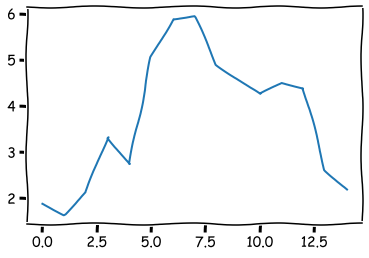

In [14]:
plt.plot(array_np.cumsum())
plt.show()

### Descriptive statistics with Pandas

Pandas is much more versatile for statistical calculations than Numpy, and should be used if there is no specific reason to use Numpy. Let's load a more interesting dataset to analyse.

In [15]:
import pandas as pd

In [16]:
stat_df = pd.read_csv('stat_data.csv',index_col=0)

In [17]:
stat_df

,NAME,DIV. YIELD,ROE (%),R&D/SALES (%),CoGS/SALES - 5 Y (%),SG%A/SALES 5Y (%),ACCOUNTING STANDARD,Accounting Controversies,Basis of EPS data,INDUSTRY GROUP,IBES COUNTRY CODE
0,APPLE,0.71,55.92,4.95,56.64,6.53,US standards (GAAP),N,NaN,4030.0,US
1,SAUDI ARABIAN OIL,0.21,32.25,NaN,NaN,NaN,IFRS,N,EPS,5880.0,FW
2,MICROSOFT,1.07,40.14,13.59,26.46,19.56,US standards (GAAP),N,NaN,4080.0,US
3,AMAZON.COM,0.00,21.95,12.29,56.82,21.28,US standards (GAAP),N,NaN,7091.0,US
4,FACEBOOK CLASS A,0.00,19.96,21.00,7.06,20.42,US standards (GAAP),N,NaN,8580.0,US
...,...,...,...,...,...,...,...,...,...,...,...
295,BHP GROUP,4.23,16.61,NaN,45.50,NaN,IFRS,N,IFRS,5210.0,EX
296,CITIC SECURITIES 'A',1.67,7.77,NaN,10.91,27.44,IFRS,N,EPS,4395.0,FC
297,EDWARDS LIFESCIENCES,0.00,28.73,16.09,23.33,30.22,US standards (GAAP),N,NaN,3440.0,US
298,GREE ELECT.APP. 'A',2.25,24.52,NaN,66.35,14.94,Local standards,N,EPS,3720.0,FC


In [18]:
stat_df.set_index('NAME',inplace=True) # Set the NAME variable as index of the dataframe

Usually, the default setting with the Pandas statistical functions is that they calculate column statistics. For example, here is the **sum** function (does not make much sense here).

In [19]:
stat_df.sum()

DIV. YIELD                  695.563
ROE (%)                   40278.820
R&D/SALES (%)              1368.340
CoGS/SALES - 5 Y (%)      11247.840
SG%A/SALES 5Y (%)          5384.550
INDUSTRY GROUP          1521606.000
dtype: float64

With **axis=1**, you can calculate also row-sums.

In [20]:
stat_df.sum(axis=1)

NAME
APPLE                                      4154.75
SAUDI ARABIAN OIL                          5912.46
MICROSOFT                                  4180.82
AMAZON.COM                                 7203.34
FACEBOOK CLASS A                           8648.44
                                            ...   
BHP GROUP                                  5276.34
CITIC SECURITIES 'A'                       4442.79
EDWARDS LIFESCIENCES                       3538.37
GREE ELECT.APP. 'A'                        3828.06
HOUSING DEVELOPMENT FINANCE CORPORATION    4437.89
Length: 300, dtype: float64

There is also a cumulative sum similar to Numpy's equivalent. Notice that it calculates the cumulative sum series for columns by default.

In [21]:
stat_df[['DIV. YIELD','ROE (%)']].cumsum()

,DIV. YIELD,ROE (%)
NAME,,
APPLE,0.710,55.92
SAUDI ARABIAN OIL,0.920,88.17
MICROSOFT,1.990,128.31
AMAZON.COM,1.990,150.26
FACEBOOK CLASS A,1.990,170.22
...,...,...
BHP GROUP,690.563,40199.63
CITIC SECURITIES 'A',692.233,40207.40
EDWARDS LIFESCIENCES,692.233,40236.13


The mean value of the columns. Notice how non-numerical columns are automatically excluded.

In [22]:
stat_df.mean()

DIV. YIELD                 2.318543
ROE (%)                  138.415189
R&D/SALES (%)              8.096686
CoGS/SALES - 5 Y (%)      44.109176
SG%A/SALES 5Y (%)         22.815890
INDUSTRY GROUP          5088.983278
dtype: float64

By default, NA values are excluded. You can prevent that using **skipna=False**.

In [23]:
stat_df.mean(skipna=False)

DIV. YIELD              2.318543
ROE (%)                      NaN
R&D/SALES (%)                NaN
CoGS/SALES - 5 Y (%)         NaN
SG%A/SALES 5Y (%)            NaN
INDUSTRY GROUP               NaN
dtype: float64

**idxmin** and **idxmax** can be used to locate the maximum and minimum values along the specified axis. It does not work with string-values, so we restrict the columns.

In [24]:
stat_df[['DIV. YIELD', 'ROE (%)', 'R&D/SALES (%)',
       'CoGS/SALES - 5 Y (%)', 'SG%A/SALES 5Y (%)']].idxmax()

DIV. YIELD                               BP
ROE (%)                       COLGATE-PALM.
R&D/SALES (%)                VERTEX PHARMS.
CoGS/SALES - 5 Y (%)    CHINA PTL.& CHM.'A'
SG%A/SALES 5Y (%)       SEA 'A' SPN.ADR 1:1
dtype: object

**Describe()** is the main tool for descriptive statistics.

In [25]:
stat_df.describe()

,DIV. YIELD,ROE (%),R&D/SALES (%),CoGS/SALES - 5 Y (%),SG%A/SALES 5Y (%),INDUSTRY GROUP
count,300.000000,291.000000,169.000000,255.000000,236.000000,299.000000
mean,2.318543,138.415189,8.096686,44.109176,22.815890,5088.983278
std,2.357387,1850.606330,8.510284,21.754619,14.707107,2079.357337
min,0.000000,-318.250000,0.070000,0.000000,0.800000,1320.000000
25%,0.580000,9.345000,1.700000,27.620000,11.675000,3440.000000
50%,1.665000,16.460000,4.950000,45.380000,20.950000,4370.000000
75%,3.287500,27.415000,12.790000,60.520000,30.167500,7030.000000
max,13.130000,31560.000000,59.980000,87.170000,89.880000,8592.000000


You can also use **describe** for string-data.

In [26]:
stat_df['ACCOUNTING STANDARD'].describe()

count                     297
unique                      3
top       US standards (GAAP)
freq                      160
Name: ACCOUNTING STANDARD, dtype: object

Quick histograms are easy to draw with Pandas **hist()**.

In [27]:
import matplotlib.pyplot as plt

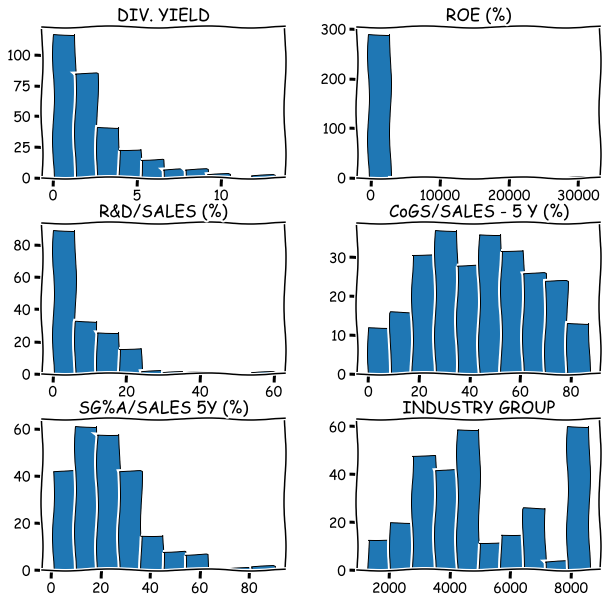

In [31]:
stat_df.hist(figsize=(10,10),grid=False,edgecolor='k')
plt.show()

It is also easy to draw bar plots, line plots, etc. from variables.

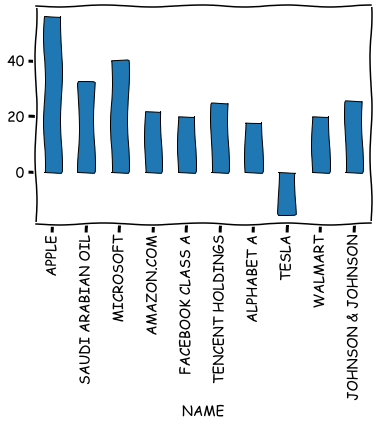

In [32]:
stat_df.iloc[0:10]['ROE (%)'].plot.bar(grid=False,edgecolor='k')
plt.show()

Pandas also has functions for quantiles, median, mean absolute deviation, variance, st. dev., skewness, kurtosis etc.

In [33]:
stat_df.median()

DIV. YIELD                 1.665
ROE (%)                   16.460
R&D/SALES (%)              4.950
CoGS/SALES - 5 Y (%)      45.380
SG%A/SALES 5Y (%)         20.950
INDUSTRY GROUP          4370.000
dtype: float64

In [34]:
stat_df.std()

DIV. YIELD                 2.357387
ROE (%)                 1850.606330
R&D/SALES (%)              8.510284
CoGS/SALES - 5 Y (%)      21.754619
SG%A/SALES 5Y (%)         14.707107
INDUSTRY GROUP          2079.357337
dtype: float64

In [35]:
stat_df.skew()

DIV. YIELD               1.613739
ROE (%)                 16.995965
R&D/SALES (%)            2.052940
CoGS/SALES - 5 Y (%)    -0.023779
SG%A/SALES 5Y (%)        1.282915
INDUSTRY GROUP           0.433038
dtype: float64

In [36]:
stat_df.kurt()

DIV. YIELD                3.045584
ROE (%)                 289.548386
R&D/SALES (%)             7.757465
CoGS/SALES - 5 Y (%)     -0.895532
SG%A/SALES 5Y (%)         2.793218
INDUSTRY GROUP           -1.026390
dtype: float64

In [37]:
stat_df.mad() # Mean absolute deviation

DIV. YIELD                 1.754535
ROE (%)                  232.701188
R&D/SALES (%)              6.541208
CoGS/SALES - 5 Y (%)      18.349461
SG%A/SALES 5Y (%)         11.128403
INDUSTRY GROUP          1787.992573
dtype: float64

There are also functions for first differences (**diff**) and percentage changes (**pct_change**) that are useful for time series. We check them more closely when we discuss time series.

A correlation matrix can be calculated with **corr()**.

In [38]:
stat_df.corr()

,DIV. YIELD,ROE (%),R&D/SALES (%),CoGS/SALES - 5 Y (%),SG%A/SALES 5Y (%),INDUSTRY GROUP
DIV. YIELD,1.000000,-0.005395,-0.296876,0.090552,-0.246277,0.020287
ROE (%),-0.005395,1.000000,-0.059943,-0.018829,0.037760,-0.051351
R&D/SALES (%),-0.296876,-0.059943,1.000000,-0.525651,0.243388,-0.076826
CoGS/SALES - 5 Y (%),0.090552,-0.018829,-0.525651,1.000000,-0.478954,-0.069946
SG%A/SALES 5Y (%),-0.246277,0.037760,0.243388,-0.478954,1.000000,0.169234
INDUSTRY GROUP,0.020287,-0.051351,-0.076826,-0.069946,0.169234,1.000000


Seaborn can be used to visualise the correlation matrix.

In [39]:
import seaborn as sns

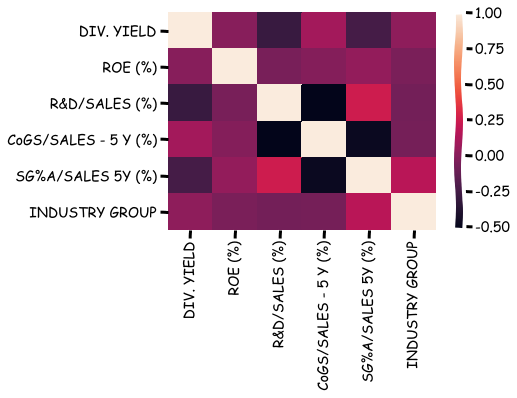

In [40]:
sns.heatmap(stat_df.corr())
plt.show()

There is also a function for covariance.

In [41]:
stat_df.cov()

,DIV. YIELD,ROE (%),R&D/SALES (%),CoGS/SALES - 5 Y (%),SG%A/SALES 5Y (%),INDUSTRY GROUP
DIV. YIELD,5.557272,-2.353205e+01,-6.218173,4.458371,-8.101883,9.944971e+01
ROE (%),-23.532053,3.424744e+06,-1230.260093,-815.944421,1151.251649,-1.970465e+05
R&D/SALES (%),-6.218173,-1.230260e+03,72.424937,-93.699026,30.348468,-1.296751e+03
CoGS/SALES - 5 Y (%),4.458371,-8.159444e+02,-93.699026,473.263467,-152.229721,-3.340919e+03
SG%A/SALES 5Y (%),-8.101883,1.151252e+03,30.348468,-152.229721,216.298997,5.397233e+03
INDUSTRY GROUP,99.449713,-1.970465e+05,-1296.750542,-3340.919268,5397.233215,4.323727e+06


If you want to calculate correlations between two dataframes, you can use **corr_with()**.

To collect the unique values of a Pandas series, you can use **unique()**.

In [42]:
stat_df['IBES COUNTRY CODE'].unique()

array(['  US', '  FW', '  FH', '  FA', '  ES', '  FC', '  FK', '  EF',
       '  FJ', '  ED', '  FI', '  EN', '  EX', '  EZ', '  SD', '  CN',
       '  EI', '  EB', '  AA', '  EE', '  KS', nan, '  LB', '  ER',
       '  SN', '  LA', '  SS', '  FL'], dtype=object)

**value_counts** can be used to collect frequencies of values. Here the counts are presented as a bar chart. Notice how we chain dataframe functions.

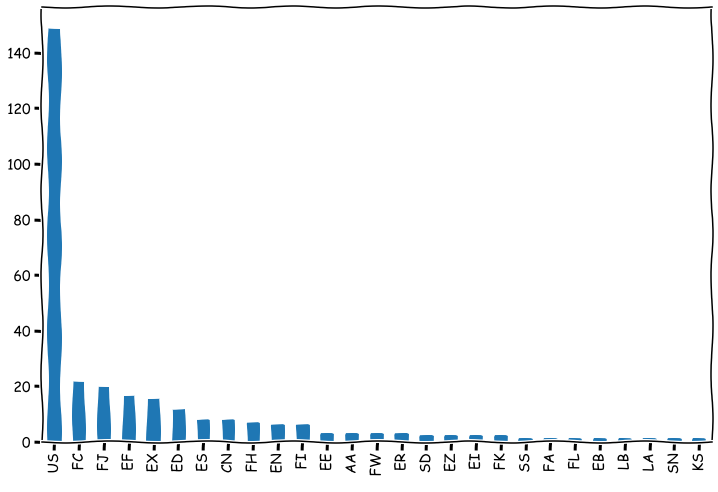

In [43]:
stat_df['IBES COUNTRY CODE'].value_counts().plot.bar(figsize=(12,8),grid=False)
plt.show()

### Probability and statistics functions

What we mainly need in data analysis from probability theory are random variables and distributions. Numpy has a large collection of random number generators that are located in module **numpy.random**. There are random number generators for every distribution that you will ever need.

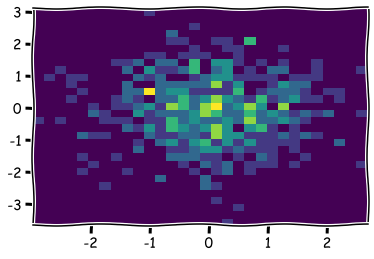

In [44]:
x_np = np.random.normal(size=500) # Create 500 normal random variables with *mean=0* and *std=1*
y_np = np.random.normal(size=500)
plt.hist2d(x_np,y_np,bins=30) # Visualise the joint frequency distribution using 2D-histogram.
plt.show()

In [45]:
hyper_np = np.random.hypergeometric(8,9,12,size=(3,3))

In [46]:
hyper_np

array([[6, 5, 7],
       [7, 4, 6],
       [6, 4, 5]])

Probably the most important distributions are the standard normal distribution, the chi2 distribution and the binomial distribution.

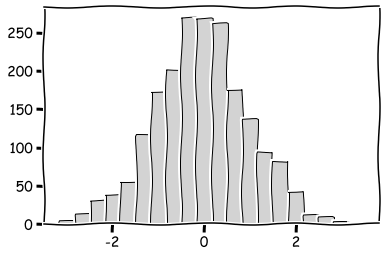

In [47]:
plt.hist(np.random.normal(size=2000),bins=20,color='lightgray',edgecolor='k')
plt.show()

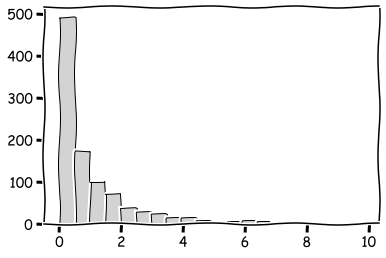

In [48]:
plt.hist(np.random.chisquare(1,size=1000),bins=20,color='lightgray',edgecolor='k')
plt.show()

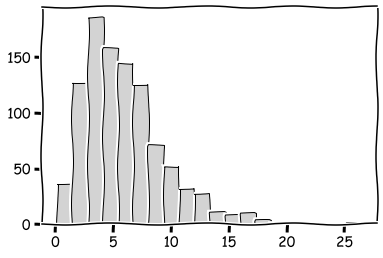

In [49]:
plt.hist(np.random.chisquare(6,size=1000),bins=20,color='lightgray',edgecolor='k')
plt.show()

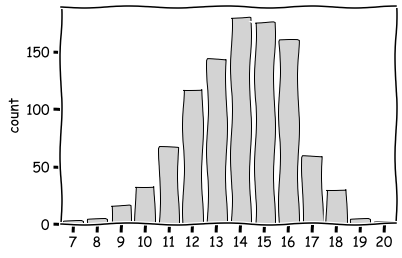

In [50]:
sns.countplot(x=np.random.binomial(20,0.7,size=1000),color='lightgray',edgecolor='k')
plt.show()

It is good to remember that computer-generated random numbers are not truly random numbers. They are so called pseudorandom numbers. It is because they are generated using a deterministic algorithm and a seed value.

### Statistical analysis with statsmodels

Pandas (and Numpy) has only functions for basic statistical analysis, like descriptive statistics. If you want to do more advanced (traditional) statistical analysis, the **statsmodels** library is a good option.

For example, linear regerssion models are very easy to build with **statsmodels**. Let's model the dividend yield as a function of the R&D intensity.

In [51]:
import statsmodels.api as sm
import seaborn as sns

Remove the missing values of the endogenous variable.

In [52]:
stat_df.columns

Index(['DIV. YIELD', 'ROE (%)', 'R&D/SALES (%)', 'CoGS/SALES - 5 Y (%)',
       'SG%A/SALES 5Y (%)', 'ACCOUNTING STANDARD', 'Accounting Controversies',
       'Basis of EPS data', 'INDUSTRY GROUP', 'IBES COUNTRY CODE'],
      dtype='object')

In [53]:
reduced_df = stat_df[~stat_df['DIV. YIELD'].isna()]

In [54]:
reduced_df

,DIV. YIELD,ROE (%),R&D/SALES (%),CoGS/SALES - 5 Y (%),SG%A/SALES 5Y (%),ACCOUNTING STANDARD,Accounting Controversies,Basis of EPS data,INDUSTRY GROUP,IBES COUNTRY CODE
NAME,,,,,,,,,,
APPLE,0.71,55.92,4.95,56.64,6.53,US standards (GAAP),N,NaN,4030.0,US
SAUDI ARABIAN OIL,0.21,32.25,NaN,NaN,NaN,IFRS,N,EPS,5880.0,FW
MICROSOFT,1.07,40.14,13.59,26.46,19.56,US standards (GAAP),N,NaN,4080.0,US
AMAZON.COM,0.00,21.95,12.29,56.82,21.28,US standards (GAAP),N,NaN,7091.0,US
FACEBOOK CLASS A,0.00,19.96,21.00,7.06,20.42,US standards (GAAP),N,NaN,8580.0,US
...,...,...,...,...,...,...,...,...,...,...
BHP GROUP,4.23,16.61,NaN,45.50,NaN,IFRS,N,IFRS,5210.0,EX
CITIC SECURITIES 'A',1.67,7.77,NaN,10.91,27.44,IFRS,N,EPS,4395.0,FC
EDWARDS LIFESCIENCES,0.00,28.73,16.09,23.33,30.22,US standards (GAAP),N,NaN,3440.0,US


One curiosity with statsmodels is that you need to add constant to the x-variables.

In [55]:
x = sm.add_constant(reduced_df['R&D/SALES (%)'])

In [56]:
model = sm.OLS(reduced_df['DIV. YIELD'],x,missing='drop')

In [57]:
results = model.fit()

The parameters and t-values of the model.

In [58]:
results.params

const            2.987641
R&D/SALES (%)   -0.085857
dtype: float64

In [59]:
results.tvalues

const            11.920297
R&D/SALES (%)    -4.017612
dtype: float64

With **summary()**, you can output all the key regression results.

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DIV. YIELD   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     16.14
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           8.87e-05
Time:                        10:59:21   Log-Likelihood:                -383.71
No. Observations:                 169   AIC:                             771.4
Df Residuals:                     167   BIC:                             777.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9876      0.251     11.920      0.000       2.493       3.482
R&D/SALES (%)    -0.0859      0.021     -4.018      0.000      -0.128      -0.044
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.976
Skew:                           1.519   Prob(JB):                     4.84e-25
Kurtosis:                       5.583   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
results.summary2() # Different format for the results.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.083   
Dependent Variable: DIV. YIELD       AIC:                771.4227
Date:               2021-03-02 10:59 BIC:                777.6824
No. Observations:   169              Log-Likelihood:     -383.71 
Df Model:           1                F-statistic:        16.14   
Df Residuals:       167              Prob (F-statistic): 8.87e-05
R-squared:          0.088            Scale:              5.5566  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const              2.9876   0.2506 11.9203 0.0000  2.4928  3.4825
R&D/SALES (%)     -0.0859   0.0214 -4.0176 0.0001 -0.1280 -0.0437
-----------------------------------------------------------------
Omnibus:             55.164       Durbin-Watson:          2.035  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       111.976
Skew:                1.519        Prob(JB):               0.000  
Kurtosis:            5.583        Condition No.:          16     
=================================================================

"""

**Regplot** can be usd to plot the model over observations.

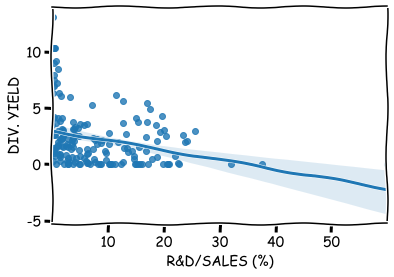

In [62]:
sns.regplot(x='R&D/SALES (%)',y='DIV. YIELD',data=reduced_df)
plt.show()

It is easy to add dummy-variables to your model using the Pandas **get_dummes()** -function. For more than two categories, it creates more than one dummmy-variables. 

Create a new variable **acc_dummy** that has a value one if the company has accounting controversies.

In [63]:
reduced_df['acc_dummy'] = pd.get_dummies(stat_df['Accounting Controversies'],drop_first=True)

In [64]:
x = sm.add_constant(reduced_df[['R&D/SALES (%)','acc_dummy']])

Let's chance also the dependent  variable to **ROE**.

In [65]:
model = sm.OLS(reduced_df['ROE (%)'],x,missing='drop')

In [66]:
results = model.fit()

In [67]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ROE (%)   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3493
Date:                Tue, 02 Mar 2021   Prob (F-statistic):              0.706
Time:                        10:59:26   Log-Likelihood:                -1521.4
No. Observations:                 165   AIC:                             3049.
Df Residuals:                     162   BIC:                             3058.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           386.3556    273.551      1.412      0.160    -153.830     926.542
R&D/SALES (%)   -18.6428     23.255     -0.802      0.424     -64.564      27.279
acc_dummy      -324.4416    960.810     -0.338      0.736   -2221.768    1572.885
==============================================================================
Omnibus:                      359.716   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176047.571
Skew:                          12.611   Prob(JB):                         0.00
Kurtosis:                     161.021   Cond. No.                         57.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, there is something wrong. If you observed the histograms carefully, you'd seen that there is a clear outlier in **ROE** values.

<AxesSubplot:>

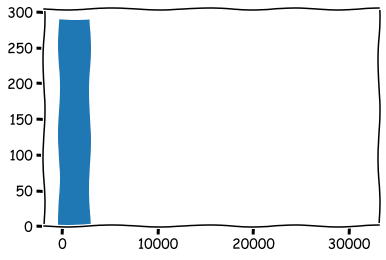

In [68]:
reduced_df['ROE (%)'].hist(grid=False)

In [69]:
reduced_df['ROE (%)'].describe()

count      291.000000
mean       138.415189
std       1850.606330
min       -318.250000
25%          9.345000
50%         16.460000
75%         27.415000
max      31560.000000
Name: ROE (%), dtype: float64

A maximum value of 31560! We can remove it, or we can winsorise the data. Let's winsorise.

In [70]:
reduced_df['ROE (%)'].clip(lower = reduced_df['ROE (%)'].quantile(0.025),
                           upper = reduced_df['ROE (%)'].quantile(0.975),inplace=True)

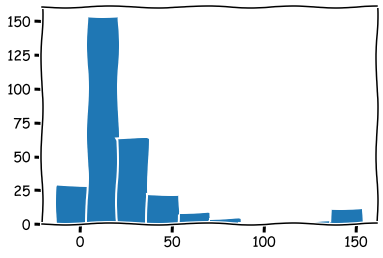

In [71]:
reduced_df['ROE (%)'].hist(grid=False)
plt.show()

Let's try to build the regression model again.

In [72]:
x = sm.add_constant(reduced_df[['R&D/SALES (%)','acc_dummy']])

In [73]:
model = sm.OLS(reduced_df['ROE (%)'],x,missing='drop')

In [74]:
results = model.fit()

In [75]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ROE (%)   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.307
Date:                Tue, 02 Mar 2021   Prob (F-statistic):              0.273
Time:                        10:59:31   Log-Likelihood:                -801.47
No. Observations:                 165   AIC:                             1609.
Df Residuals:                     162   BIC:                             1618.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.0008      3.485      6.888      0.000      17.120      30.882
R&D/SALES (%)     0.2424      0.296      0.818      0.414      -0.343       0.827
acc_dummy       -15.6371     12.239     -1.278      0.203     -39.807       8.532
==============================================================================
Omnibus:                      113.723   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              671.865
Skew:                           2.677   Prob(JB):                    1.28e-146
Kurtosis:                      11.310   Cond. No.                         57.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although accounting controversies has a negative coefficient, it is not statisticall significant.

Statsmodels is a very comprehensive statistical library. It has modules for nonparametric statistics, generalised linear models, robust regression and time series analysis. We do not go into more details of Statsmodels at this point. If you want to learn more, check the Statsmodels documentation: [www.statsmodels.org/stable/index.html](https://www.statsmodels.org/stable/index.html)

### Statistical analysis with scipy.stats

Another option for statistical analysis in Python is the **stats** module of **Scipy**. It has many functions that are not included in other statistical libraries. However, Scipy does not handle automatically nan-values. Accounting data almost always has missing values, thus, they need to be manually handled, which is a bit annoying.

Like Numpy, it has an extensive range of random number generators and probability distributions. It also has a long list of statistical tests.

In [76]:
import scipy.stats as ss

In SciPy, random variables with different distributions are presented as classes, which have methods for random number generation, computing the PDF, CDF and inverse CDF, fitting parameters and computing moments.

In [77]:
norm_rv = ss.norm(loc=1.0, scale=0.5)

Expected value

In [78]:
norm_rv.expect()

1.0000000000000002

The value of probability distribution function at 0.

In [79]:
norm_rv.pdf(0.)

0.10798193302637613

The value of cumulative distribution function at 1.

In [80]:
norm_rv.cdf(1.)

0.5

Standard deviation

In [81]:
norm_rv.std()

0.5

The visualisation of the pdf and cdf of the RV.

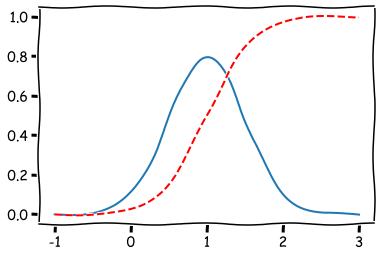

In [82]:
plt.plot(np.linspace(-1,3,100),[norm_rv.pdf(x) for x in np.linspace(-1,3,100)])
plt.plot(np.linspace(-1,3,100),[norm_rv.cdf(x) for x in np.linspace(-1,3,100)],'r--')
plt.show()

The list of distributions in Scipy is long. Here you can read more about them: [docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)

There are many functions for descriptive statistics. The full list can be found also from the link above.

In [83]:
ss.describe(stat_df['DIV. YIELD'])

DescribeResult(nobs=300, minmax=(0.0, 13.13), mean=2.3185433333333334, variance=5.557272148617614, skewness=1.6056590920933027, kurtosis=2.975127168101123)

In [84]:
ss.describe(stat_df['ROE (%)'],nan_policy='omit') # Omit missing values

DescribeResult(nobs=291, minmax=(masked_array(data=-318.25,
             mask=False,
       fill_value=1e+20), masked_array(data=31560.,
             mask=False,
       fill_value=1e+20)), mean=138.41518900343644, variance=3424743.7884616023, skewness=masked_array(data=16.90823148,
             mask=False,
       fill_value=1e+20), kurtosis=284.5766560561788)

With trimmed mean, we can define the limits to the values of a variable from which the mean is calculated. There are **trimmed** versions for many other statistics too.

In [85]:
ss.tmean(stat_df['ROE (%)'].dropna(),limits=(-50,50))

16.574942965779467

Standard error of the mean.

In [86]:
ss.sem(stat_df['DIV. YIELD'])

0.1361037857496699

Bayesian confidence intervals.

In [87]:
ss.bayes_mvs(stat_df['DIV. YIELD'])

(Mean(statistic=2.3185433333333334, minmax=(2.0939767460292535, 2.5431099206374133)),
 Variance(statistic=5.594694856689113, minmax=(4.8824225544086, 6.392205754936627)),
 Std_dev(statistic=2.3633205707178084, minmax=(2.2096204548312364, 2.528281185892231)))

Interquantile range

In [88]:
ss.iqr(stat_df['DIV. YIELD'])

2.7075

The list of correlation functions is also extensive. The functions also return the p-value from the signficance test.

In [89]:
temp_df = stat_df[['DIV. YIELD','SG%A/SALES 5Y (%)']].dropna()

The output of SciPy is a bit ascetic. The first value is the correlation coefficient and the second value is the p-value.

Pearson's correlation coefficient

In [90]:
ss.pearsonr(temp_df['DIV. YIELD'],temp_df['SG%A/SALES 5Y (%)']) 

(-0.24627736138733555, 0.00013219335560399939)

Spearman's rank correlation coefficient

In [91]:
ss.spearmanr(temp_df['DIV. YIELD'],temp_df['SG%A/SALES 5Y (%)'])

SpearmanrResult(correlation=-0.14763581111674745, pvalue=0.02330319841753993)

There are many statistical tests included. Let's divide our data to US companies and others to test the Scipy **ttest()**

In [92]:
us_df = stat_df[stat_df['IBES COUNTRY CODE'] == '  US'] # US
nonus_df = stat_df[~(stat_df['IBES COUNTRY CODE'] == 'US')] # Non-US (notice the tilde symbol)

This test assumes equal variance for both groups. The result implies that the (mean) dividend yield is higher in non-US companies.

In [93]:
ss.ttest_ind(us_df['DIV. YIELD'],nonus_df['DIV. YIELD'],nan_policy='omit')

Ttest_indResult(statistic=-2.53873471415298, pvalue=0.011463548320684814)

There are functions for many other statistical tasks, like transformations, statistical distnaces, contigency tables. Check the Scipy homepage for more details.

### Time series

Time series analysis is an important topic in accounting. Python and Pandas has many functions for time series analysis. Time series data has usually fixed frequency, which means that data points occur at regular intervals. Time series can also be irregular, which can potentially make the analysis very difficult. Luckily, Python/Pandas simplifies things considerably.

#### Datetime

Python has modules for date/time -handling by default, the most important being **datetime**.

In [94]:
from datetime import datetime

In [95]:
datetime.now() # Date and time now

datetime.datetime(2021, 3, 2, 10, 59, 43, 813494)

In [96]:
datetime.now().year

2021

In [97]:
datetime.now().second

44

You can calculate with the datetime objects.

In [98]:
difference = datetime(2020,10,10) - datetime(1,1,1)

In [99]:
difference

datetime.timedelta(days=737707)

In [100]:
difference.days

737707

You can use **timedelta** to transform datetime objects.

In [101]:
from datetime import timedelta

In [102]:
date1 = datetime(2020,1,1)

The first argument of timedelta is days.

In [103]:
date1 + timedelta(12)

datetime.datetime(2020, 1, 13, 0, 0)

Dates can be easily turned into string using the Python **str()** function.

In [104]:
str(date1)

'2020-01-01 00:00:00'

If you want to specify the date/time -format, you can use the strftime method of the datetime object.

In [105]:
date2 = datetime(2015,3,18)

%Y: four digit year, %m: two-digit month, %d: two-digit day, %W: week number (Monday is the first day of a week.)

In [106]:
date2.strftime('%Y - %m - %d : Week number %W')

'2015 - 03 - 18 : Week number 11'

There is also an opposite method, **strptime()**, that turns a string into a datetime object.

In [107]:
sample_data = 'Year: 2012, Month: 10, Day: 12'

datetime.strptime(sample_data, 'Year: %Y, Month: %m, Day: %d')

datetime.datetime(2012, 10, 12, 0, 0)

As you can see, you can strip the date information efficiently, if you know the the format of your date-string. There is also a great non-standard library that can be used to automatically strip date from many different date representations.

In [108]:
from dateutil.parser import parse

In [109]:
parse('Dec 8, 2009')

datetime.datetime(2009, 12, 8, 0, 0)

In [110]:
parse('11th of March, 2018')

datetime.datetime(2018, 3, 11, 0, 0)

You have to be careful with the following syntax.

In [111]:
parse('8/3/2015')

datetime.datetime(2015, 8, 3, 0, 0)

In [112]:
parse('8/3/2015',dayfirst = True)

datetime.datetime(2015, 3, 8, 0, 0)

The most important Pandas function for handling dates is **to_datetime**. We will see many applications of it in the following, but let's first load an interesting time series.

The data contains accountants and auditors as a percent of the US labor force 1850 to 2016. This data is a little bit difficult, because the frequency is irregular. The first datapoints have a ten-year interval, and from 2000 onwards the interval is one year.

In [113]:
times_df =pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/AccountantsAuditorsPct.csv')

In [114]:
times_df.head()

,Unnamed: 0,dat
0,1850,0.000133
1,1860,0.000147
2,1870,0.000142
3,1880,0.000150
4,1900,0.000414


In [115]:
times_df.rename({'Unnamed: 0':'Year'},axis=1,inplace=True) # Correct the name of the year variable

In [116]:
times_df.head()

,Year,dat
0,1850,0.000133
1,1860,0.000147
2,1870,0.000142
3,1880,0.000150
4,1900,0.000414


With **to_datetime**, we can transform the years as datetime objects.

In [117]:
times_df['Year'] = pd.to_datetime(times_df['Year'],format = '%Y')

In [118]:
times_df.head()

,Year,dat
0,1850-01-01,0.000133
1,1860-01-01,0.000147
2,1870-01-01,0.000142
3,1880-01-01,0.000150
4,1900-01-01,0.000414


Plotting and other things are much easier, if we set the dates as the index.

In [119]:
times_df.set_index('Year',inplace=True)

There is a special object in Pandas for indices that have datetime objects, **Datetimeindex**.

In [120]:
type(times_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

You can pick up the timestamp from an index value.

In [121]:
time_stamp = times_df.index[8]

In [122]:
time_stamp

Timestamp('1940-01-01 00:00:00')

Now you can pick up values with these timestamps.

In [123]:
times_df.loc[time_stamp]

dat    0.0046
Name: 1940-01-01 00:00:00, dtype: float64

Actually, you can also use date strings. Pandas will automatically transform it.

In [124]:
times_df.loc['1980']

,dat
Year,
1980-01-01,0.008672


Slicing works also.

In [125]:
times_df.loc['2010':]

,dat
Year,
2010-01-01,0.013358
2011-01-01,0.013382
2012-01-01,0.013687
2013-01-01,0.013253
2014-01-01,0.012542
2015-01-01,0.012652
2016-01-01,0.012518


Plotting is easy with the Pandas' built-in functions.

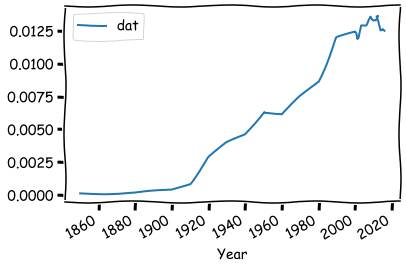

In [126]:
times_df.plot()
plt.show()

Everything works nicely, although we have a dataset with irregular frequency.

If we want, we can transform the series into a fixed frequency time series using **resample**..

In [127]:
times_df.head(15)

,dat
Year,
1850-01-01,0.000133
1860-01-01,0.000147
1870-01-01,0.000142
1880-01-01,0.000150
1900-01-01,0.000414
1910-01-01,0.000908
1920-01-01,0.002922
1930-01-01,0.003971
1940-01-01,0.004600


Using yearly resampling adds missing values, because for most of the interval we are increasing the frequency.

In [128]:
times_df.resample('Y').mean().head(15)

,dat
Year,
1850-12-31,0.000133
1851-12-31,NaN
1852-12-31,NaN
1853-12-31,NaN
1854-12-31,NaN
1855-12-31,NaN
1856-12-31,NaN
1857-12-31,NaN
1858-12-31,NaN


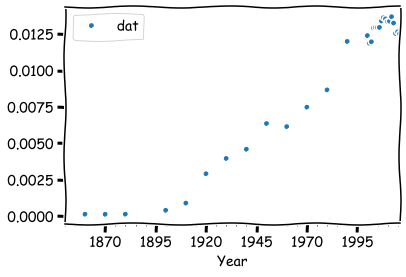

In [129]:
times_df.resample('Y').mean().plot(style = '.')
plt.show()

If we want, we can fill the missing values with **fillna**.

In [130]:
times_df.resample('Y').ffill().head(15)

,dat
Year,
1850-12-31,0.000133
1851-12-31,0.000133
1852-12-31,0.000133
1853-12-31,0.000133
1854-12-31,0.000133
1855-12-31,0.000133
1856-12-31,0.000133
1857-12-31,0.000133
1858-12-31,0.000133


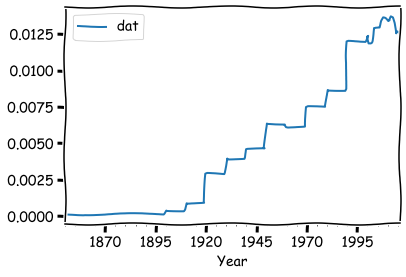

In [131]:
times_df.resample('Y').ffill().plot()
plt.show()

We can also decrease the frequency and decide how the original data is aggregated. Let's simulate a stock price using a random walk series.

In [132]:
sample_period = pd.date_range('2010-06-1', periods = 500, freq='D')

temp_np = np.random.randint(0,2,500)

temp_np = np.where(temp_np > 0,1,-1)

In [133]:
rwalk_df = pd.Series(np.cumsum(temp_np), index=sample_period)

In [134]:
rwalk_df.head(15)

2010-06-01    1
2010-06-02    2
2010-06-03    1
2010-06-04    2
2010-06-05    1
2010-06-06    2
2010-06-07    3
2010-06-08    4
2010-06-09    5
2010-06-10    6
2010-06-11    5
2010-06-12    4
2010-06-13    5
2010-06-14    6
2010-06-15    5
Freq: D, dtype: int32

Resample as weekly data where the daily values are aggregated together with **mean()**.

In [135]:
rwalk_df.resample('W').mean()

2010-06-06    1.500000
2010-06-13    4.571429
2010-06-20    5.857143
2010-06-27    7.142857
2010-07-04    5.285714
                ...   
2011-09-18   -3.142857
2011-09-25   -4.142857
2011-10-02   -4.285714
2011-10-09   -5.285714
2011-10-16   -3.500000
Freq: W-SUN, Length: 72, dtype: float64

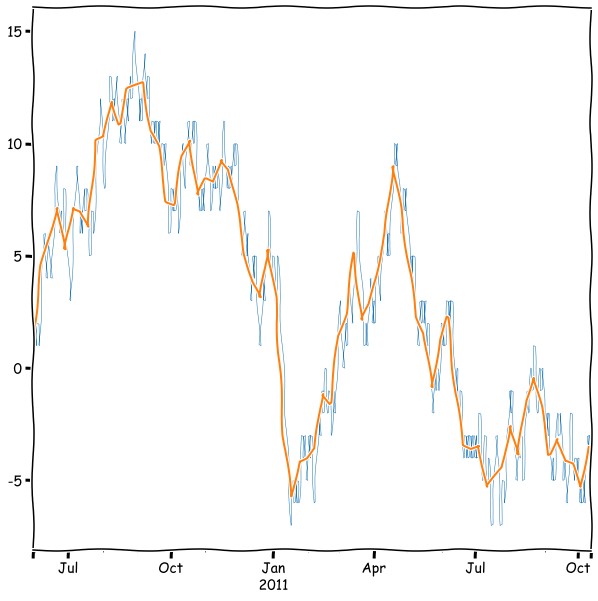

In [136]:
rwalk_df.plot(linewidth=0.5)
rwalk_df.resample('W').mean().plot(figsize=(10,10))
plt.show()

A very common way to aggregate data in finance, is open-high-low-close.

In [137]:
rwalk_df.resample('W').ohlc().tail()

,open,high,low,close
2011-09-18,-3,-2,-5,-5
2011-09-25,-4,-2,-6,-2
2011-10-02,-3,-3,-5,-5
2011-10-09,-6,-4,-6,-4
2011-10-16,-3,-3,-4,-4


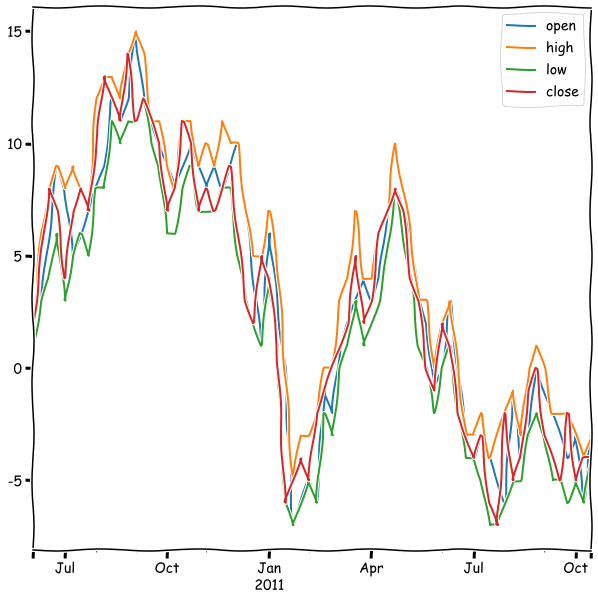

In [138]:
rwalk_df.resample('W').ohlc().plot(figsize=(10,10))
plt.show()

A very important topic in time series analysis is filtering with moving windows.

With rolling, we can easily create a moving average from a time series.

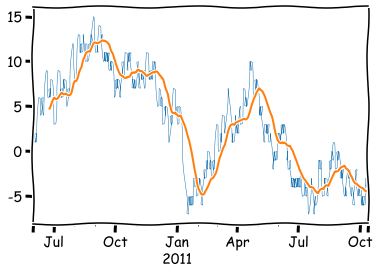

In [139]:
rwalk_df.plot(linewidth=0.5)
rwalk_df.rolling(25).mean().plot()
plt.show()

As you can see, by default the function calculates the average only when all values are awailable, and therefore, there are missing values at the beginning. You can avoid this with the **min_periods** parameter. With the **center** parameter, you can remove the lag in the average:

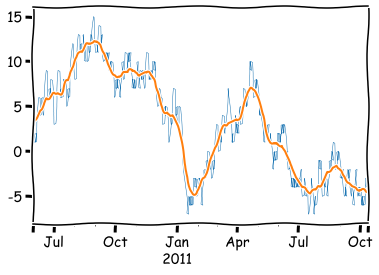

In [140]:
rwalk_df.plot(linewidth=0.5)
rwalk_df.rolling(25,min_periods=1,center=True).mean().plot()
plt.show()

Very often, the moving average is calculated using an exponentially weighted filter. Pandas has the **ewm** function for that.

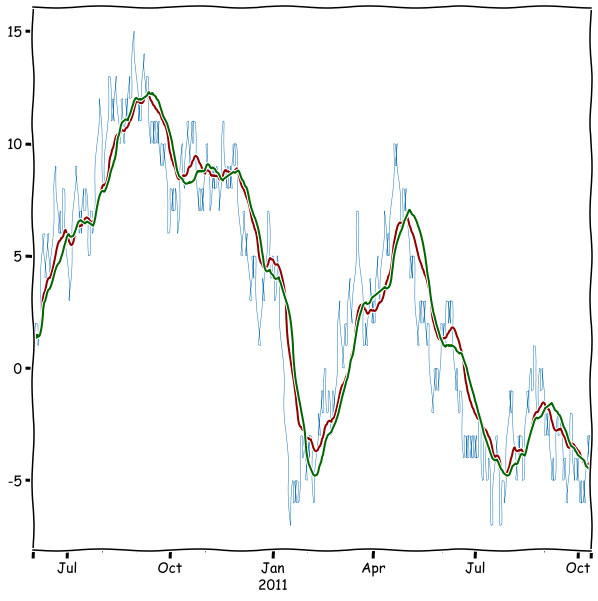

In [144]:
rwalk_df.plot(linewidth=0.5)
rwalk_df.ewm(span = 25,min_periods=1).mean().plot(color='darkred',figsize=(10,10))
rwalk_df.rolling(25,min_periods=1).mean().plot(color='darkgreen')
plt.show()

With **rolling**, we can even calculate correlations from aggregates. Let's load a more interesting data for that.

In [145]:
euro_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/EuStockMarkets.csv',index_col=0)

**freg='B'** means business day frequency. Here is the full list aliases for frequencies: [Offset aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

In [146]:
euro_df.index = pd.date_range('1991-01-01', '1998-02-16', freq='B')

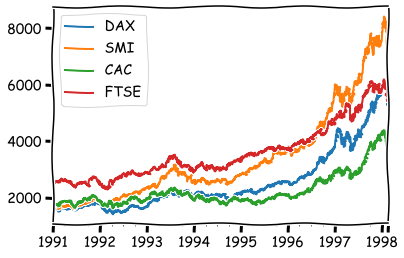

In [147]:
euro_df.plot()
plt.show()

The returns of stock indices.

In [148]:
euro_ret_df = euro_df.pct_change()

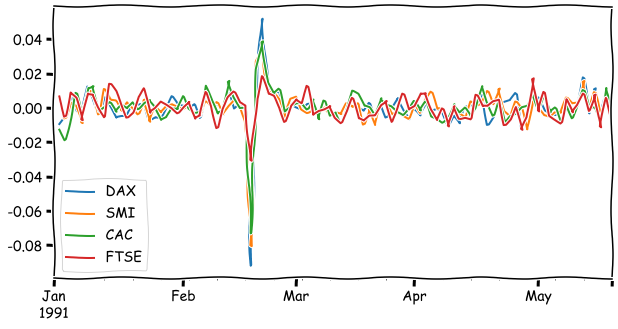

In [149]:
euro_ret_df.iloc[:100].plot(figsize=(10,5))
plt.show()

The correlation between DAX and the other indices calculated from a 64-day window.

<AxesSubplot:>

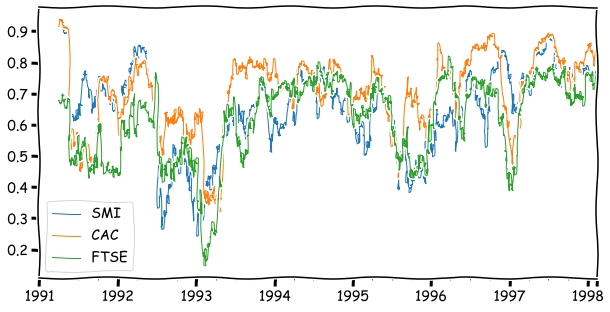

In [150]:
euro_ret_df['DAX'].rolling(64).corr(euro_ret_df[['SMI','CAC','FTSE']]).plot(linewidth=1,figsize=(10,5))

With **apply**, you can even define your own functions to calculate an aggregate value from windows. The following calculates an interquartile range from the window.

In [150]:
inter_quart = lambda x: np.quantile(x,0.75)-np.quantile(x,0.25)

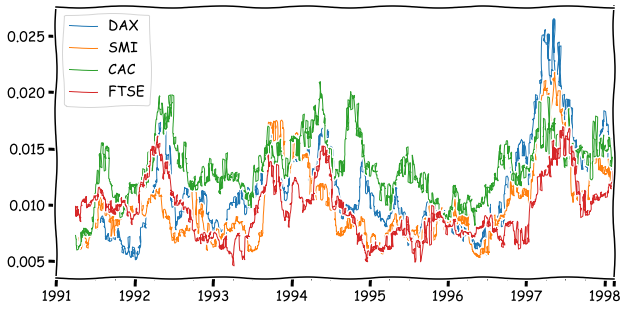

In [151]:
euro_ret_df.rolling(64).apply(inter_quart).plot(linewidth=1,figsize=(10,5))
plt.show()

Time series analysis in Pandas is a vast topic, and we have only scratched a surface. If you want to learn more, check [pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

#### ARIMA models

In this section, I will shortly introduce ARIMA models. They assume that in a time series the present valua depends on the previous values (AR = autoregressive). They also include moving averages (MA). "I" in the name means that the modeled time series is the n:th difference of the original time series (I = integrated):

Let's build an ARIMA model for the euro dataset.

One essential tool to assess how the data depends on the previous values and select a model that reflects this is the sample autocorrelation function. The sample ACF will provide us with an estimate of the ACF and suggests a time series model suitable for representing the data's dependence. For example, a sample ACF close to zero for all nonzero lags suggests that an appropriate model for the data might be iid noise.

In [157]:
from pandas.plotting import autocorrelation_plot

Lags 1, 6, 11 and 13 appear to be statistically signficant.

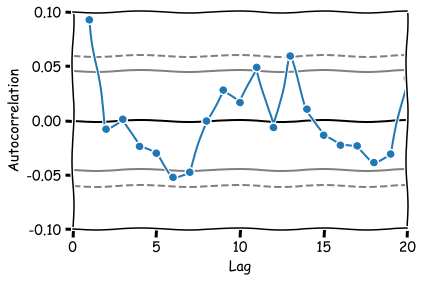

In [184]:
autocorrelation_plot(euro_ret_df['FTSE'][1:],marker='o')
plt.xlim(0,20)
plt.ylim(-0.1,0.1)
plt.show()

In [185]:
from statsmodels.tsa.arima.model import ARIMA

Let's separate the last 100 observations from the data for testing.

In [193]:
train_set, test_set = euro_df['FTSE'][:-100].to_list(), euro_df['FTSE'][-100:].to_list()

Based on the ACF plot, 13 lags, integrated=1 (first difference of the original series) and first order moving average.

In [194]:
model = ARIMA(train_set, order=(13,1,1))
model_fit = model.fit()

In [195]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1760
Model:                ARIMA(13, 1, 1)   Log Likelihood               -8345.813
Date:                Wed, 24 Feb 2021   AIC                          16721.627
Time:                        14:01:39   BIC                          16803.714
Sample:                             0   HQIC                         16751.964
                               - 1760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3538      0.359      0.985      0.325      -0.350       1.058
ar.L2         -0.0475      0.043     -1.097      0.273      -0.132       0.037
ar.L3          0.0187      0.019      0.975      0.330      -0.019       0.056
ar.L4         -0.0326      0.021     -1.531      0.126      -0.074       0.009
ar.L5         -0.0324      0.022     -1.461      0.144      -0.076       0.011
ar.L6         -0.0331      0.023     -1.461      0.144      -0.078       0.011
ar.L7         -0.0292      0.028     -1.055      0.292      -0.084       0.025
ar.L8          0.0376      0.025      1.504      0.133      -0.011       0.087
ar.L9          0.0543      0.023      2.414      0.016       0.010       0.098
ar.L10        -0.0099      0.029     -0.344      0.731      -0.066       0.046
ar.L11         0.0572      0.019      2.956      0.003       0.019       0.095
ar.L12        -0.0438      0.029     -1.498      0.134      -0.101       0.014
ar.L13         0.0529      0.020      2.594      0.009       0.013       0.093
ma.L1         -0.2452      0.358     -0.684      0.494      -0.947       0.457
sigma2       773.8240     16.100     48.063      0.000     742.269     805.380
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1049.11
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The residuals of the model (difference between the prediction and the true value).

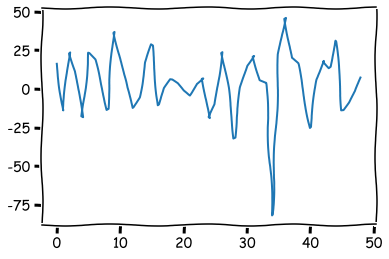

In [197]:
plt.plot(model_fit.resid[1:50])
plt.show()

The distribution of the residuals.

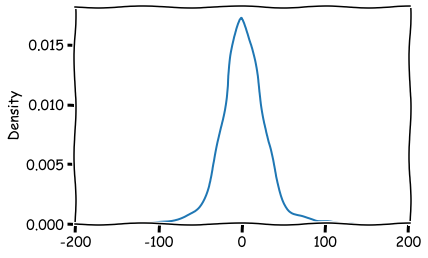

In [198]:
sns.kdeplot(model_fit.resid[1:])
plt.show()

Prediction 100 steps forward and comparison to real values. As you can see from the plot below, the prediction is heavily based on the current value. The best prediction for tomorrow is the current value.

In [199]:
temp_set = train_set
predictions = []

In [200]:
for step in range(len(test_set)):
    model=ARIMA(temp_set, order=(5,1,1))
    results = model.fit()
    prediction = results.forecast()[0]
    predictions.append(prediction)
    temp_set.append(test_set[step])

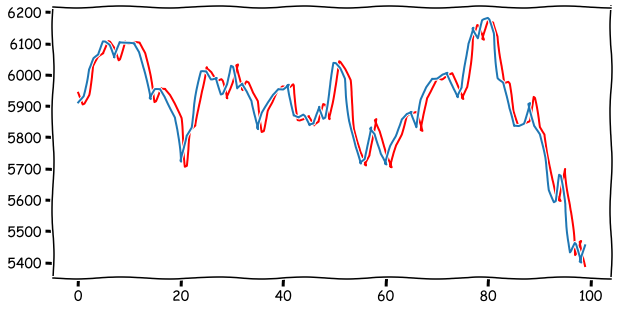

In [202]:
plt.figure(figsize=(10,5))
plt.plot(predictions,color='red')
plt.plot(test_set)
plt.show()

A comprehensive list of model diagnostics can be plotted with **plot_diagnostics**.

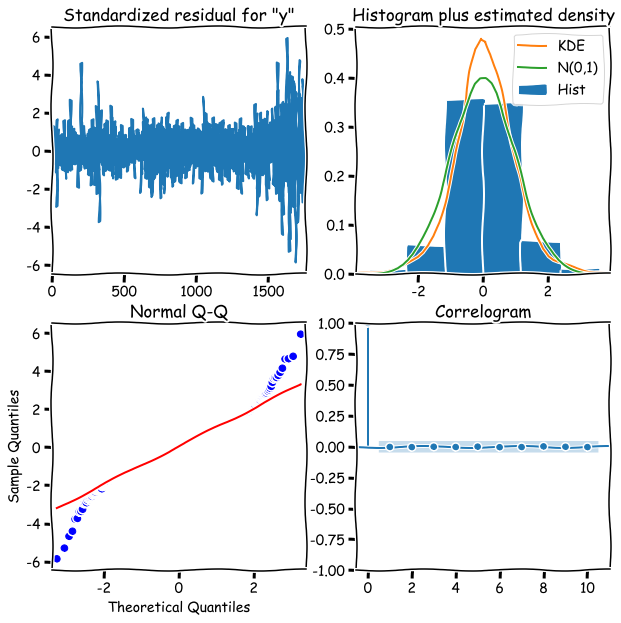

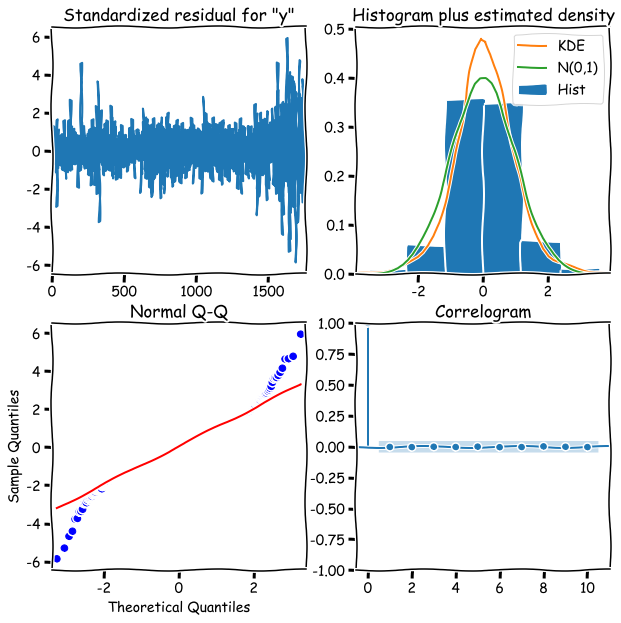

In [204]:
model_fit.plot_diagnostics(figsize=(10,10))